# QPG with parameter array $[[8, 8, 4, 24], [1, 0, 2; 2, 1; 1]]$

Consider a parameter set for a $4$-class association scheme $\mathcal{A} = (X, \mathcal{R} = \{R_0 = \operatorname{Id}_X, R_1, R_2, R_3, R_4\})$ with $45$ vertices with the intersection numbers $p^h_{ij}$ ($0 \le h, i, j \le 4$) given below.

In [1]:
%display latex
import drg
from eigenspace import Eigenspace, VectorError, relmatrix

In [2]:
p = drg.ASParameters(p=list(zip(*
    [ [ [ 1, 0, 0, 0,  0 ], [ 0, 1, 0, 0,  0 ], [ 0, 0, 1, 0,  0 ], [ 0, 0, 0, 1,  0 ], [ 0, 0, 0, 0,  1 ] ], 
      [ [ 0, 8, 0, 0,  0 ], [ 1, 0, 1, 0,  6 ], [ 0, 1, 3, 1,  3 ], [ 0, 0, 2, 0,  6 ], [ 0, 2, 1, 1,  4 ] ], 
      [ [ 0, 0, 8, 0,  0 ], [ 0, 1, 3, 1,  3 ], [ 1, 3, 1, 0,  3 ], [ 0, 2, 0, 0,  6 ], [ 0, 1, 1, 1,  5 ] ], 
      [ [ 0, 0, 0, 4,  0 ], [ 0, 0, 1, 0,  3 ], [ 0, 1, 0, 0,  3 ], [ 1, 0, 0, 3,  0 ], [ 0, 1, 1, 0,  2 ] ], 
      [ [ 0, 0, 0, 0, 24 ], [ 0, 6, 3, 3, 12 ], [ 0, 3, 3, 3, 15 ], [ 0, 6, 6, 0, 12 ], [ 1, 4, 5, 2, 12 ] ] ]
)))
p.Q.change_ring(AA)

[                  1                  12                  12                   8                  12]
[                  1  3.828711915796611?  2.086359453047315?                  -1 -5.915071368843926?]
[                  1 -5.430113787701859?  4.925350582358777?                  -1  0.504763205343083?]
[                  1                  -3                  -3                   8                  -3]
[                  1  0.533800623968416? -2.337236678468698?                  -1  1.803436054500281?]

The graph $\Gamma_1 = (X, R_1)$ is a quotient-polynomial graph with parameter array $[[8, 8, 4, 24], [1, 0, 2; 2, 1; 1]]$. From the intersection numbers and the dual eigenmatrix above, we can see that the association scheme $\mathcal{A}$ is imprimitive with imprimitivity set $\tilde{0} = \{0, 3\}$ and dual imprimitivity set $\overline{0} = \{0, 3\}$. We will consider embeddings of subschemes of $\mathcal{A}$ into its eigenspace $S_1$ of dimension $m_1 = 12$. Let us obtain the inner products (i.e., cosines of the angles) between unit vectors $u'_x$ for the vertices $x \in X$ corresponding to the relation they are in. Although the dual eigenmatrix has entries from a degree $6$ extension of the field of rational numbers, we will explore the relations between the scalar products.

In [3]:
p.Q.base_ring()

Number Field in e with defining polynomial x^6 - 72*x^4 + 1296*x^2 - 1620 with e = -6.495855523093691?

In [4]:
si = 1
m = p.Q[0, si]
angles6, = zip(*(p.Q[:, si] / p.Q[0, si]))
[AA(x) for x in angles6]

[1, 0.3190593263163843?, -0.4525094823084883?, -1/4, 0.0444833853307014?]

In [5]:
_, rho, sigma, _, tau = angles6
(rho + sigma + 3*tau, 8*rho^2 + 2*rho - 1 + sigma)

(0, 0)

We see that these values can be expressed in terms of powers of $\rho$. Since its minimal polynomial has degree $3$, it follows that these values are members of a degree $3$ extension $\mathbb{F}$ of the field of rational numbers.

In [6]:
rho.minpoly()

x^3 - 3/16*x + 7/256

Let $\alpha, \beta, \gamma$ denote the values of $\rho, \sigma, \tau$ in $\mathbb{F}$ and verify that their numeric approximations match.

In [7]:
F.<alpha> = QQ.extension(rho.minpoly(), embedding=RDF(rho.complex_embedding()))
beta = -8 * alpha^2 - 2 * alpha + 1
gamma = -(alpha + beta)/3
angles = (F(1), alpha, beta, F(-1/4), gamma)
angles

(1, alpha, -8*alpha^2 - 2*alpha + 1, -1/4, 8/3*alpha^2 + 1/3*alpha - 1/3)

In [8]:
[AA(z) for z in angles]

[1, 0.3190593263163843?, -0.4525094823084883?, -1/4, 0.04448338533070134?]

Since the graph $(X, R_3)$ is a union of nine $5$-cliques, we may consider a single $R_3$-clique $X_1$ and find the coefficients for the vectors $u'_x$ ($x \in X_1$).

In [9]:
S = Eigenspace(m, angles)
G11 = G21 = Graph(5)
G31 = graphs.CompleteGraph(5)
R1 = relmatrix(G11, G21, G31, vcs=range(5))
S.vectors(R1)

[               1              (0)              (0)              (0)              (0)              (0)              (0)              (0)              (0)              (0)              (0)              (0)]
[            -1/4   1/4 * sqrt(15)              (0)              (0)              (0)              (0)              (0)              (0)              (0)              (0)              (0)              (0)]
[            -1/4 -1/12 * sqrt(15)   1/6 * sqrt(30)              (0)              (0)              (0)              (0)              (0)              (0)              (0)              (0)              (0)]
[            -1/4 -1/12 * sqrt(15) -1/12 * sqrt(30)   1/4 * sqrt(10)              (0)              (0)              (0)              (0)              (0)              (0)              (0)              (0)]
[            -1/4 -1/12 * sqrt(15) -1/12 * sqrt(30)  -1/4 * sqrt(10)              (0)              (0)              (0)              (0)              (0)              (0)              (0)              (0)]

Let us now consider two $R_3$-cliques, say, $X_1$ and $X_2$. Since $p^1_{31} + 1 = p^2_{31} = p^4_{31} = 1$, $p^1_{32} = p^2_{32} + 1 = p^4_{32} = 1$ and $p^1_{34} = p^2_{34} = p^4_{34} + 1 = 3$, it follows that each vertex from one of these cliques is in relations $R_1, R_2, R_4$ with $1, 1, 3$ vertices in the other clique, respectively. In particular, the graphs $\Gamma^{(2)}_i = (X_1 \cup X_2, R_i)$ for $i \in \{1, 2\}$ are isomorphic to $5K_2$, and their union $\Gamma^{(2)}_{2, 3}$ is a disjoint union of even cycles and is therefore isomorphic to either $C_{10}$ or $C_4 + C_6$. We will consider both options and find out that they both admit an embedding into $S_1$.

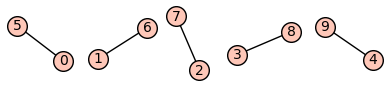

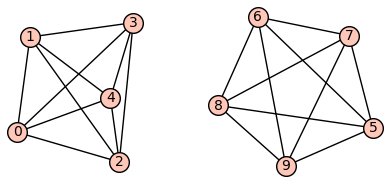

In [10]:
G12 = Graph([range(10), [(i, i+5) for i in range(5)]], format='vertices_and_edges')
G32 = 2*G31
G12.show()
G32.show()

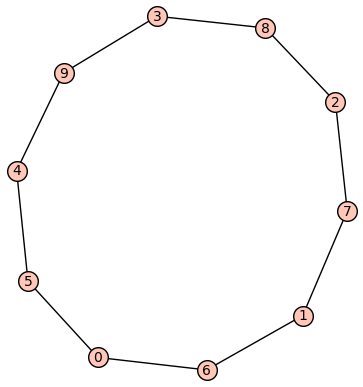

[                                                                                                               1                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)]
[                                                                                                            -1/4                                                                                                   1/4 * sqrt(15)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)]
[                                                                                                            -1/4                                                                                                 -1/12 * sqrt(15)                                                                                                   1/6 * sqrt(30)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                                                                                              (0)                                         

In [11]:
G22a = Graph([range(10), [(i, (i+1) % 5 +5) for i in range(5)]], format='vertices_and_edges')
(G12.union(G22a)).show()
R2a = relmatrix(G12, G22a, G32, vcs=range(10))
S.vectors(R2a)

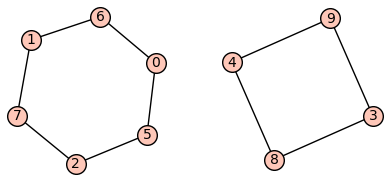

[                                                                                     1                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)]
[                                                                                  -1/4                                                                         1/4 * sqrt(15)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)]
[                                                                                  -1/4                                                                       -1/12 * sqrt(15)                                                                         1/6 * sqrt(30)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)]
[                                                                                  -1/4                                                                       -1/12 * sqrt(15)                                                                       -1/12 * sqrt(30)                                                                         1/4 * sqrt(10)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                                    (0)                                                                               

In [12]:
G22b = Graph([range(10), [(0, 6), (1, 7), (2, 5), (3, 9), (4, 8)]], format='vertices_and_edges')
(G12.union(G22b)).show()
R2b = relmatrix(G12, G22b, G32, vcs=range(10))
S.vectors(R2b)

Since $p^2_{22} = 1$, the graph $\Gamma_2 = (X, R_2)$ contains a triangle $x_1 x_2 x_3$ (in fact, each edge of $\Gamma_2$ lies on precisely one triangle). Without loss of generality, we may assume that $x_\ell \in X_\ell$ ($\ell = 1, 2, 3$), where $X_1$, $X_2$ and $X_3$ are three $R_3$-cliques, and define $X^{(3)} = X_1 \cup X_2 \cup X_3$. The graphs $\Gamma^{(3)}_i = (X^{(3)}, R_i)$ ($i = 1, 2$) are unions of cycles of lengths divisible by $3$. Since $p^1_{11} = 0$, $\Gamma^{(3)}_1$ contains no triangles and is therefore isomorphic to either $C_{15}$ or $C_9 + C_6$. On the other hand, by the above assumption, $\Gamma^{(3)}_2$ has a triangle as a connected component.

We look for candidates for $\Gamma^{(3)}_2$ by identifying $1$-factors of the digraph $\vec{\Gamma}^{(3)}_{2,4} = (X^{(3)}, \vec{R}^{(3)}_{2,4})$, where $\vec{R}^{(3)}_{2,4} = \{(x, y) \in R^{(3)}_2 \cup R^{(3)}_4 \mid x \in X_i, \ y \in X_j, \ j - i \equiv 1 \pmod{3}\}$ and taking their underlying graphs.

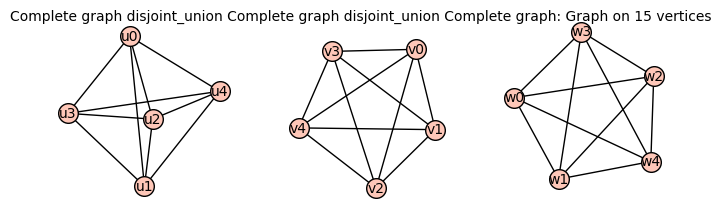

In [13]:
labels = ('u', 'v', 'w')
G33 = 3 * graphs.CompleteGraph(5)
G33.relabel([f'{c}{i}' for c in labels for i in range(5)])
G33

In [14]:
def edges(E, negate=False):
    return [(f'{labels[h-1]}{i}', f'{labels[h]}{j}') for h in range(3) for i in range(5) for j in range(5)
            if E(h, i, j) ^^ negate]

def onefactors(G):
    A = Graph(G).automorphism_group()
    s = set()
    d = set()
    candidates = [((next(G.vertex_iterator()), ), )]
    while candidates:
        new = []
        for cc in candidates:
            seen = {v for c in cc for v in c}
            for u in G.neighbors_out(cc[-1][-1]):
                if u == cc[-1][0]:
                    try:
                        new.append((*cc, (next(v for v in G.vertex_iterator() if v not in seen), )))
                    except StopIteration:
                        sc = tuple(sorted(min(c[i:] + c[:i] for i in range(len(c))) for c in cc))
                        if sc not in d:
                            o = [tuple(sorted(min(c[i:] + c[:i] for i in range(len(c))) for c in oc))
                                 for oc in A.orbit(sc, "OnSetsTuples")]
                            d.update(o)
                            s.add(min(o))
                elif u not in seen:
                    new.append((*cc[:-1], (*cc[-1], u)))
        candidates = new
    return s

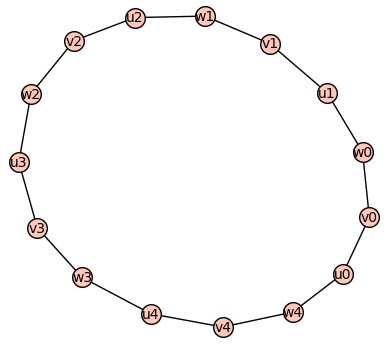

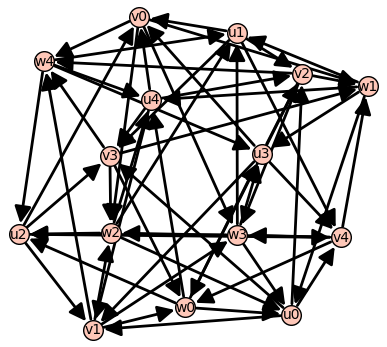

In [15]:
Ea = lambda h, i, j: (j-i) % 5 == (h == 0)
G13a = Graph([list(G33), edges(Ea)])
D243a = DiGraph([list(G33), edges(Ea, True)])
G13a.show()
D243a.show()

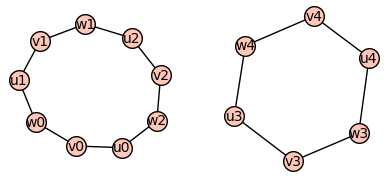

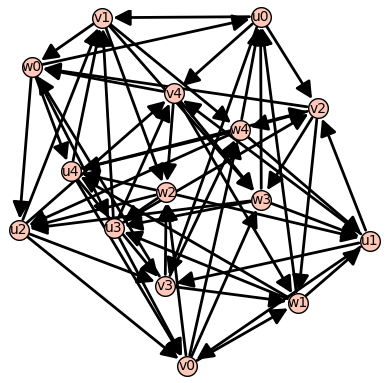

In [16]:
Eb = lambda h, i, j: (i < 3 and j < 3 and (j-i) % 3 == (h == 0)) or (i >= 3 and j >= 3 and (j-i) % 2 == (h == 0))
G13b = Graph([list(G33), edges(Eb)])
D243b = DiGraph([list(G33), edges(Eb, True)])
G13b.show()
D243b.show()

In the cases when $\Gamma^{(3)}_1$ is isomorphic to $C_{15}$ and $C_9 + C_6$, we find $5704$ and $4736$ distinct (up to isomorphism) $1$-factors of $\vec{\Gamma}^{(3)}_{2,4}$, respectively.

In [17]:
sa = onefactors(D243a)
len(sa)

5704

In [18]:
sb = onefactors(D243b)
len(sb)

4736

Of these, $3637$ and $3028$, respectively, contain a triangle. By our assumption, it will suffice to consider the underlying graphs of these cases as the graph $\Gamma^{(3)}_2$.

In [19]:
sa3 = sorted(cc for cc in sa if any(len(c) == 3 for c in cc))
sb3 = sorted(cc for cc in sb if any(len(c) == 3 for c in cc))
len(sa3), len(sb3)

(3637, 3028)

Let us try to find the coefficients for the vectors $u'_x$ ($x \in X^{(3)}$) in each of these cases.

In [20]:
def cycles2graph(cc):
    return Graph([list(G33), [(c[i-1], c[i]) for c in cc for i in range(len(c))]])

def vector_matrices(G13, s):
    R3s = [relmatrix(G13, cycles2graph(cc), G33, vcs=G33.vertices()) for cc in s]
    d = {}
    for i, R in enumerate(R3s):
        try:
            d[i] = S.vectors(R)
            print(f"Graph {i}: found embedding!")
        except VectorError as ex:
            print(f"Graph {i}: {ex} (row {ex.row}, diff {ex.diff})")
    return d

In [21]:
da = %time vector_matrices(G13a, sa3)
len(da)

Graph 0: The norm of the obtained vector is larger than one! (row 10, diff (-848*alpha^2 - 196*alpha + 124)/91)
Graph 1: The norm of the obtained vector is larger than one! (row 10, diff (-848*alpha^2 - 196*alpha + 124)/91)
Graph 2: The norm of the obtained vector is larger than one! (row 10, diff (-848*alpha^2 - 196*alpha + 124)/91)
Graph 3: The norm of the obtained vector is larger than one! (row 10, diff (-848*alpha^2 - 196*alpha + 124)/91)
Graph 4: The norm of the obtained vector is larger than one! (row 10, diff (-848*alpha^2 - 196*alpha + 124)/91)
Graph 5: The norm of the obtained vector is larger than one! (row 10, diff (-848*alpha^2 - 196*alpha + 124)/91)
Graph 6: The norm of the obtained vector is larger than one! (row 10, diff (-848*alpha^2 - 196*alpha + 124)/91)
Graph 7: The norm of the obtained vector is larger than one! (row 10, diff (-848*alpha^2 - 196*alpha + 124)/91)
Graph 8: The norm of the obtained vector is larger than one! (row 10, diff (-848*alpha^2 - 196*alpha + 1

55

In [22]:
db = %time vector_matrices(G13b, sb3)
len(db)

Graph 0: The norm of the obtained vector is larger than one! (row 10, diff (-848*alpha^2 - 196*alpha + 124)/91)
Graph 1: The norm of the obtained vector is larger than one! (row 10, diff (-848*alpha^2 - 196*alpha + 124)/91)
Graph 2: The norm of the obtained vector is larger than one! (row 10, diff (-848*alpha^2 - 196*alpha + 124)/91)
Graph 3: The norm of the obtained vector is larger than one! (row 10, diff (-848*alpha^2 - 196*alpha + 124)/91)
Graph 4: The norm of the obtained vector is larger than one! (row 10, diff (-848*alpha^2 - 196*alpha + 124)/91)
Graph 5: The norm of the obtained vector is larger than one! (row 10, diff (-848*alpha^2 - 196*alpha + 124)/91)
Graph 6: The norm of the obtained vector is larger than one! (row 10, diff (-848*alpha^2 - 196*alpha + 124)/91)
Graph 7: The norm of the obtained vector is larger than one! (row 10, diff (-848*alpha^2 - 196*alpha + 124)/91)
Graph 8: The norm of the obtained vector is larger than one! (row 10, diff (-848*alpha^2 - 196*alpha + 1

45

We find that unit vectors $u'_x$ for all $x \in X^{(3)}$ can only be obtained for $55$ choices of $\Gamma^{(3)}_2$ when $\Gamma^{(3)}_1 \cong C_{15}$, and $45$ choices of $\Gamma^{(3)}_2$ when $\Gamma^{(3)}_1 \cong C_9 + C_6$. In each of these cases, we have thus determined vectors corresponding to $15$ vertices, so we should also determine the vectors corresponding to the remaining $30$ vertices. Let us verify that in each of these cases, the vectors $u'_x$ ($x \in X^{(3)}$) span the subspace $S_1$.

In [23]:
all(any(r[-1] != 0 for r in V) for V in da.values())

True

In [24]:
all(any(r[-1] != 0 for r in V) for V in db.values())

True

We will attempt to find unit vectors $u'_y$ for the remaining vertices $y \in \bigcup_{\ell=4}^9 X_\ell$.

In [25]:
def candidate_vectors(V):
    perm = Permutations([1, 2, 4, 4, 4])
    vecs = []

    for r1 in perm:
        for r2 in perm:
            for r3 in perm:
                try:
                    v = S.vector(V, [*r1, *r2, *r3])
                    if v.norm().is_one():
                        vecs.append(v)
                except VectorError:
                    continue
    return vecs

def vectors_for_relmatrices(dd):
    return {i: candidate_vectors(V) for i, V in dd.items()}

In [26]:
va = %time vectors_for_relmatrices(da)
any(va.values())

CPU times: user 1d 4h 6min 24s, sys: 17.4 s, total: 1d 4h 6min 42s
Wall time: 1d 4h 6min 43s


False

In [27]:
vb = %time vectors_for_relmatrices(db)
any(vb.values())

CPU times: user 22h 42min 2s, sys: 12.7 s, total: 22h 42min 15s
Wall time: 22h 42min 15s


False

We find no further vectors for any of the choices of $\Gamma^{(3)}_1$ and $\Gamma^{(3)}_2$ admitting an embedding into $S_1$, which means that the association scheme $\mathcal{A}$ **does not exist**.